In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [25]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

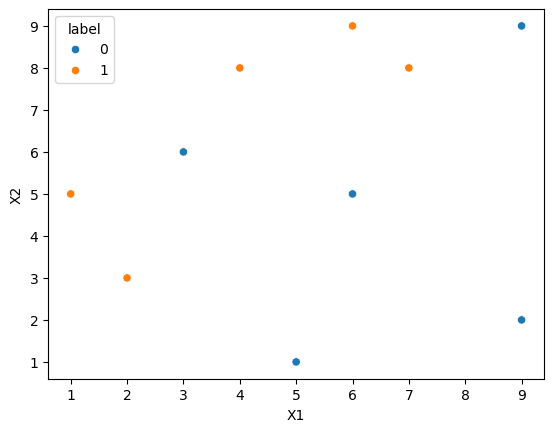

In [27]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [29]:
df['weights'] = 1/df.shape[0]

In [31]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [33]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [35]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,2].values

In [37]:
dt1.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

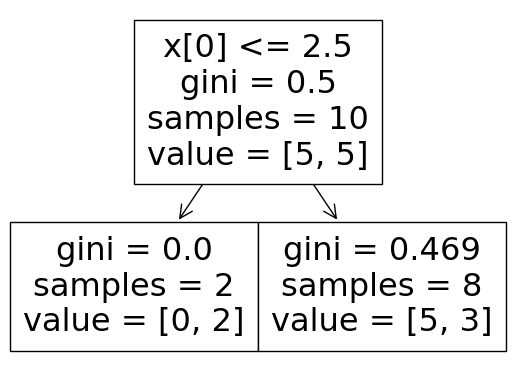

In [39]:
plot_tree(dt1)

<Axes: >

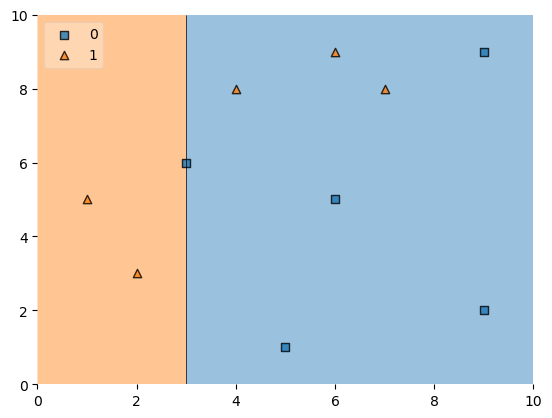

In [41]:
plot_decision_regions(X, Y, clf=dt1, legend=2)

In [43]:
df['y_pred'] = dt1.predict(X)

In [45]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [101]:
# Why do we take log and multiply with 0.5?
def calculate_model_weight(error):
    return 0.5 * np.log((1-error)/(error+0.0000001))

In [103]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.4236487635269629

In [161]:
# Interpretation of this function?
def update_row_weights(row, alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha) 

In [53]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [55]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [57]:
df['updated_weights'].sum()

0.9165153319682015

In [59]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [61]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [63]:
df['normalized_weights'].sum()

1.0

In [65]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [67]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [69]:
df[['X1', 'X2', 'label','weights','y_pred','updated_weights', 'cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [71]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [73]:
index_values = create_new_dataset(df)

In [75]:
index_values

[5, 8, 2, 0, 1, 0, 1, 5, 9, 3]

In [77]:
second_df = df.iloc[index_values, [0,1,2,3]]

In [79]:
second_df

,X1,X2,label,weights
5,6,9,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1


In [81]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [83]:
X = second_df.iloc[:,0:2].values
Y = second_df.iloc[:,2].values

In [85]:
dt2.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

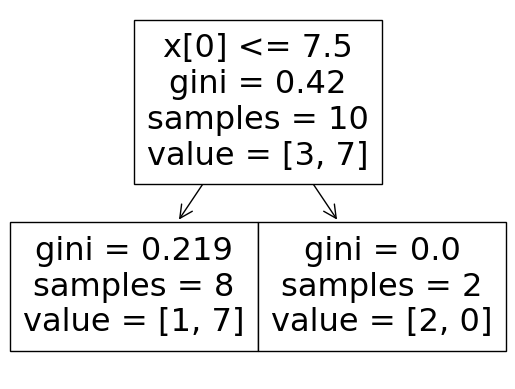

In [87]:
plot_tree(dt2)

<Axes: >

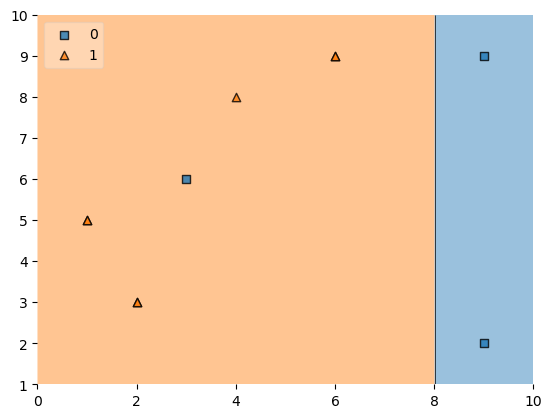

In [89]:
plot_decision_regions(X, Y, clf=dt2, legend=2)

In [91]:
second_df['y_pred'] = dt2.predict(X)

In [93]:
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1


In [97]:
alpha2 = calculate_model_weight(0.1)

In [105]:
alpha2

1.0986122886681098

In [107]:
def update_row_weight(row, alpha=5.40):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [109]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [111]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.065508
8,9,9,0,0.1,0,0.065508
2,3,6,0,0.1,1,0.152653
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
5,6,9,1,0.1,1,0.065508
9,9,2,0,0.1,0,0.065508
3,4,8,1,0.1,1,0.065508


In [113]:
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [115]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.065508,0.088259
8,9,9,0,0.1,0,0.065508,0.088259
2,3,6,0,0.1,1,0.152653,0.205670
0,1,5,1,0.1,1,0.065508,0.088259
1,2,3,1,0.1,1,0.065508,0.088259
0,1,5,1,0.1,1,0.065508,0.088259
1,2,3,1,0.1,1,0.065508,0.088259
5,6,9,1,0.1,1,0.065508,0.088259
9,9,2,0,0.1,0,0.065508,0.088259
3,4,8,1,0.1,1,0.065508,0.088259


In [117]:
second_df['normalized_weights'].sum()

0.9999999999999998

In [119]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [121]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [123]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
5,6,9,1,0.1,1,0.065508,0.088259,0.088259,0.000000
8,9,9,0,0.1,0,0.065508,0.088259,0.176518,0.088259
2,3,6,0,0.1,1,0.152653,0.205670,0.382188,0.176518
0,1,5,1,0.1,1,0.065508,0.088259,0.470447,0.382188
1,2,3,1,0.1,1,0.065508,0.088259,0.558706,0.470447
0,1,5,1,0.1,1,0.065508,0.088259,0.646965,0.558706
1,2,3,1,0.1,1,0.065508,0.088259,0.735223,0.646965
5,6,9,1,0.1,1,0.065508,0.088259,0.823482,0.735223
9,9,2,0,0.1,0,0.065508,0.088259,0.911741,0.823482
3,4,8,1,0.1,1,0.065508,0.088259,1.000000,0.911741


In [125]:
index_values = create_new_dataset(second_df)

In [127]:
third_df = second_df.iloc[index_values, [0,1,2,3]]

In [129]:
third_df

,X1,X2,label,weights
2,3,6,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [131]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
Y = second_df.iloc[:,2].values

In [133]:
dt3.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

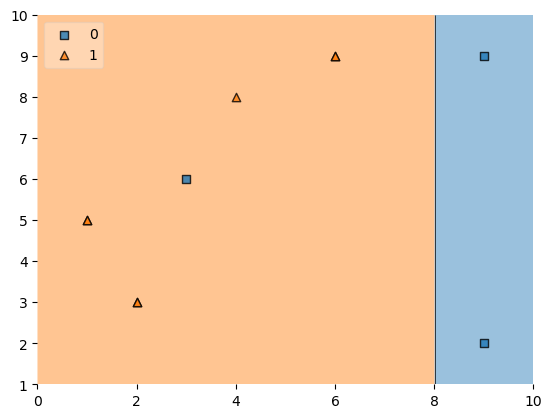

In [135]:
plot_decision_regions(X, Y, clf=dt3, legend=2)

In [137]:
third_df['y_pred'] = dt3.predict(X)

In [139]:
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
2,3,6,0,0.1,0
5,6,9,1,0.1,1
8,9,9,0,0.1,1
5,6,9,1,0.1,1
2,3,6,0,0.1,1
9,9,2,0,0.1,1
8,9,9,0,0.1,1
5,6,9,1,0.1,0
5,6,9,1,0.1,1


In [143]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.423649001622168

In [145]:
print(alpha1, alpha2, alpha3)

0.4236487635269629 1.0986122886681098 -0.423649001622168


In [147]:
# Prediction

In [151]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [153]:
dt2.predict(query)

array([1], dtype=int64)

In [155]:
dt3.predict(query)

array([1], dtype=int64)

In [157]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.0986120505729047

In [159]:
np.sign(1.09)

1.0